<a href="https://colab.research.google.com/github/fabio-baum/ia_para_engenheiros2/blob/main/Pr%C3%A1tica_Aula_11.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
# importar bibliotecas
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import root_mean_squared_error, mean_absolute_error, r2_score
import tensorflow as tf
from tensorflow import keras
from tensorflow.keras import layers

In [3]:
!pip install ucimlrepo

In [4]:
# Carregar base de dados
from ucimlrepo import fetch_ucirepo

# fetch dataset
concrete_compressive_strength = fetch_ucirepo(id=165)

# data (as pandas dataframes)
X = concrete_compressive_strength.data.features
y = concrete_compressive_strength.data.targets

# metadata
print(concrete_compressive_strength.metadata)

# variable information
print(concrete_compressive_strength.variables)


{'uci_id': 165, 'name': 'Concrete Compressive Strength', 'repository_url': 'https://archive.ics.uci.edu/dataset/165/concrete+compressive+strength', 'data_url': 'https://archive.ics.uci.edu/static/public/165/data.csv', 'abstract': 'Concrete is the most important material in civil engineering. The concrete compressive strength is a highly nonlinear function of age and ingredients. ', 'area': 'Physics and Chemistry', 'tasks': ['Regression'], 'characteristics': ['Multivariate'], 'num_instances': 1030, 'num_features': 8, 'feature_types': ['Real'], 'demographics': [], 'target_col': ['Concrete compressive strength'], 'index_col': None, 'has_missing_values': 'no', 'missing_values_symbol': None, 'year_of_dataset_creation': 1998, 'last_updated': 'Sun Feb 11 2024', 'dataset_doi': '10.24432/C5PK67', 'creators': ['I-Cheng Yeh'], 'intro_paper': {'ID': 383, 'type': 'NATIVE', 'title': 'Modeling of strength of high-performance concrete using artificial neural networks', 'authors': 'I. Yeh', 'venue': 'C

In [5]:
# Dividir os dados em conjunto de treinamento e de validação
X_train, X_val, y_train, y_val = train_test_split(
    X, y, test_size=0.2, random_state=42
)

In [6]:
# Escalonar as variáveis (scale the variables)
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_val_scaled = scaler.transform(X_val)

In [10]:
# Construir o modelo de redes neurais sequenciais
model = keras.Sequential([
    layers.Dense(128, activation='relu', input_shape=(X_train_scaled.shape[1],)),
    layers.Dropout(0.2),
    layers.Dense(64, activation='relu'),
    layers.Dropout(0.2),
    layers.Dense(32, activation='relu'),
    layers.Dense(1)
])


/usr/local/lib/python3.12/dist-packages/keras/src/layers/core/dense.py:93: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


In [17]:
# Compilar o modelo
model.compile(optimizer='adam',
              loss='mean_squared_error',
              metrics=['mae']
)

In [18]:
model.summary()

Model: "sequential"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ dense (Dense)                   │ (None, 128)            │         1,152 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout (Dropout)               │ (None, 128)            │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_1 (Dense)                 │ (None, 64)             │         8,256 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout_1 (Dropout)             │ (None, 64)             │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_2 (Dense)                 │ (None, 32)             │         2,080 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_3 (Dense)                 │ (None, 1)              │            33 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 11,521 (45.00 KB)

 Trainable params: 11,521 (45.00 KB)

 Non-trainable params: 0 (0.00 B)

In [21]:
# Treinar o modelo
history = model.fit(
    X_train_scaled, y_train,
    validation_split=0.2,
    batch_size=32,
    epochs=200,
    verbose=1
)

Epoch 1/200
21/21 ━━━━━━━━━━━━━━━━━━━━ 0s 17ms/step - loss: 70.5178 - mae: 6.3187 - val_loss: 46.8544 - val_mae: 5.3005
Epoch 2/200
21/21 ━━━━━━━━━━━━━━━━━━━━ 1s 12ms/step - loss: 77.3800 - mae: 6.8525 - val_loss: 44.3552 - val_mae: 5.0895
Epoch 3/200
21/21 ━━━━━━━━━━━━━━━━━━━━ 0s 13ms/step - loss: 66.8382 - mae: 6.3858 - val_loss: 48.9597 - val_mae: 5.3351
Epoch 4/200
21/21 ━━━━━━━━━━━━━━━━━━━━ 1s 12ms/step - loss: 68.1835 - mae: 6.3334 - val_loss: 44.2753 - val_mae: 5.0509
Epoch 5/200
21/21 ━━━━━━━━━━━━━━━━━━━━ 0s 11ms/step - loss: 77.2124 - mae: 6.5376 - val_loss: 43.1180 - val_mae: 5.0150
Epoch 6/200
21/21 ━━━━━━━━━━━━━━━━━━━━ 0s 10ms/step - loss: 67.2765 - mae: 6.1966 - val_loss: 41.1517 - val_mae: 4.9359
Epoch 7/200
21/21 ━━━━━━━━━━━━━━━━━━━━ 0s 12ms/step - loss: 70.6075 - mae: 6.4650 - val_loss: 40.4834 - val_mae: 4.8305
Epoch 8/200
21/21 ━━━━━━━━━━━━━━━━━━━━ 0s 18ms/step - loss: 63.9530 - mae: 6.0582 - val_loss: 40.9656 - val_mae: 4.8761
Epoch 9/200
21/21 ━━━━━━━━━━━━━━━━━━━━ 0

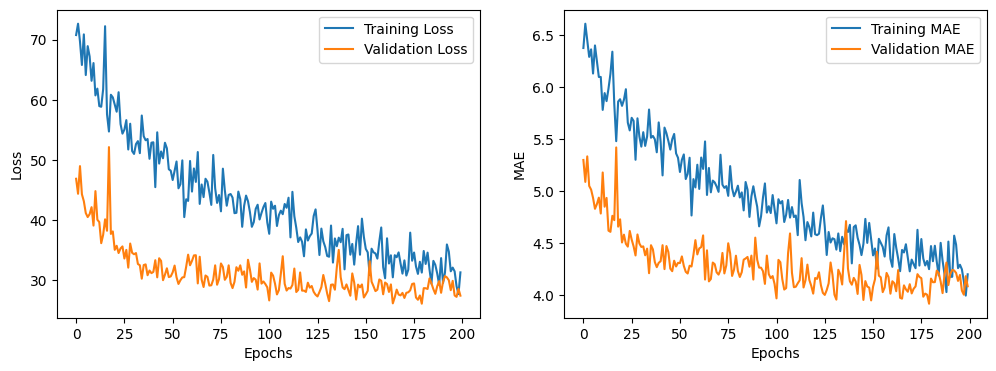

In [23]:
# Plotar a história do treinamento do modelo
plt.figure(figsize=(12, 4))

plt.subplot(1, 2, 1)
plt.plot(history.history['loss'], label="Training Loss")
plt.plot(history.history['val_loss'], label="Validation Loss")
plt.xlabel("Epochs")
plt.ylabel("Loss")
plt.legend()

plt.subplot(1, 2, 2)
plt.plot(history.history['mae'], label="Training MAE")
plt.plot(history.history['val_mae'], label="Validation MAE")
plt.xlabel("Epochs")
plt.ylabel("MAE")
plt.legend()

plt.show()

In [24]:
# Fazer predições
y_pred = model.predict(X_val_scaled)

7/7 ━━━━━━━━━━━━━━━━━━━━ 1s 43ms/step


In [26]:
# Calcular as métricas de avaliação, R2, MAE e RMSE
rmse = root_mean_squared_error(y_val, y_pred)
mae = mean_absolute_error(y_val, y_pred)
r2 = r2_score(y_val, y_pred)

print(f"RMSE: {rmse}")
print(f"MAE: {mae}")
print(f"R2: {r2}")

RMSE: 6.086226940155029
MAE: 4.489569664001465
R2: 0.8562456965446472


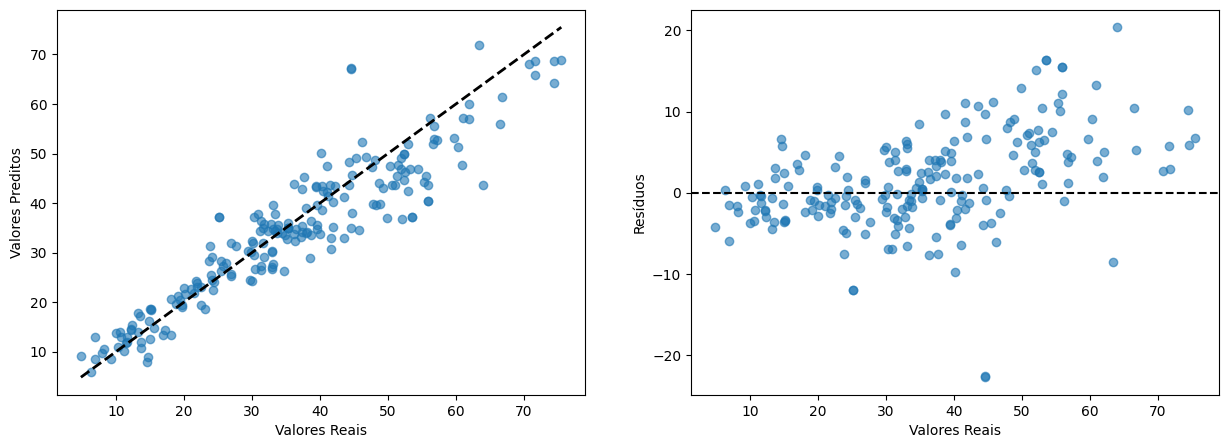

In [27]:
# Fazer o plot dos valores reais vs valores preditos
plt. figure(figsize=(15, 5))

plt.subplot(1, 2, 1)
plt.scatter(y_val, y_pred, alpha=0.6)
plt.plot([y_val.min(), y_val.max()], [y_val.min(), y_val.max()], 'k--', lw=2)
plt.xlabel("Valores Reais")
plt.ylabel("Valores Preditos")

# plot dos resíduos
plt.subplot(1, 2, 2)
residuals = y_val - y_pred
plt.scatter(y_val, residuals, alpha=0.6)
plt.axhline(y=0, color='k', linestyle='--')
plt.xlabel("Valores Reais")
plt.ylabel("Resíduos")

plt.show()

In [28]:
# Calcular a importância das variáveis por SHAP
import shap


In [29]:
# Inicializar o SHAP
explainer = shap.KernelExplainer(model.predict, X_train_scaled)

26/26 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step


In [30]:
# Calcular valores SHAP para os dados de teste
shap_values = explainer.shap_values(X_val_scaled[:200])

  0%|          | 0/200 [00:00<?, ?it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 50ms/step
6541/6541 ━━━━━━━━━━━━━━━━━━━━ 12s 2ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 57ms/step
6541/6541 ━━━━━━━━━━━━━━━━━━━━ 9s 1ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 50ms/step
6541/6541 ━━━━━━━━━━━━━━━━━━━━ 9s 1ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 51ms/step
6541/6541 ━━━━━━━━━━━━━━━━━━━━ 8s 1ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 50ms/step
6541/6541 ━━━━━━━━━━━━━━━━━━━━ 8s 1ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 58ms/step
6541/6541 ━━━━━━━━━━━━━━━━━━━━ 9s 1ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 51ms/step
6541/6541 ━━━━━━━━━━━━━━━━━━━━ 10s 2ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 55ms/step
6541/6541 ━━━━━━━━━━━━━━━━━━━━ 9s 1ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 48ms/step
6541/6541 ━━━━━━━━━━━━━━━━━━━━ 9s 1ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 52ms/step
6541/6541 ━━━━━━━━━━━━━━━━━━━━ 9s 1ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 47ms/step
6541/6541 ━━━━━━━━━━━━━━━━━━━━ 9s 1ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 56ms/step
6541/6541 ━━━━━━━━━━━━━━━━━━━━ 9s 1ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0

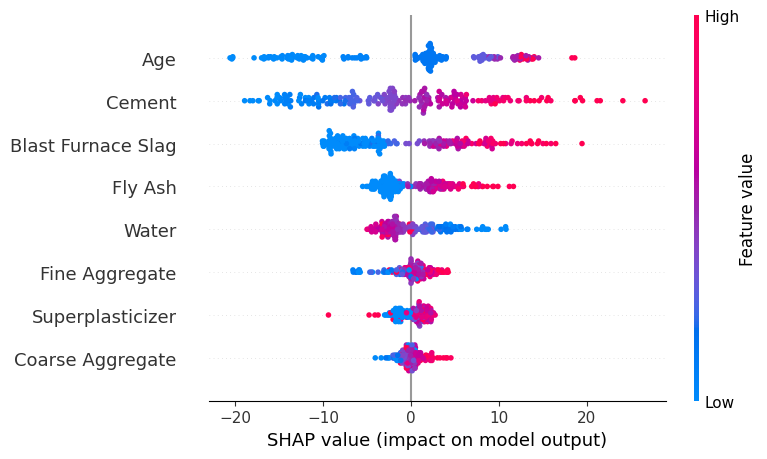

In [51]:
# Plot do SHAP
plt.figure(figsize=(10, 8))
shap.summary_plot(shap_values.squeeze(), X_val_scaled[:200],
                  feature_names=X.columns,
                  show=False)
plt.show()

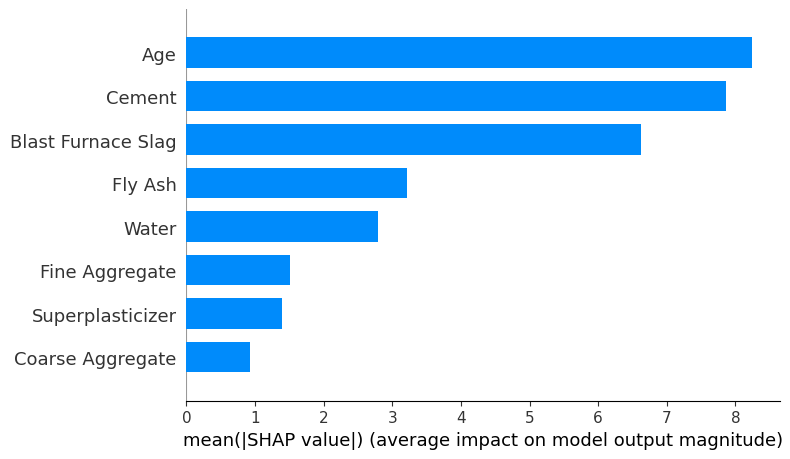

In [52]:
# plot SHAP bar
plt.figure(figsize=(10, 8))
shap.summary_plot(shap_values.squeeze(), X_val_scaled[:200],
                  feature_names=['Cement', 'Blast Furnace Slag', 'Fly Ash', 'Water', 'Superplasticizer',
       'Coarse Aggregate', 'Fine Aggregate', 'Age'],
                  plot_type="bar",
                  show=False)
plt.show()

In [42]:
X.columns

Index(['Cement', 'Blast Furnace Slag', 'Fly Ash', 'Water', 'Superplasticizer',
       'Coarse Aggregate', 'Fine Aggregate', 'Age'],
      dtype='object')

In [46]:
shap_values.shape

(200, 8, 1)